In [7]:
import __init__
from data_processing.data_splitter import DataSplitter
from data_processing.datapath_manager import DataPathManager
from data_processing.dataloader import DatasetLoader, EmbeddingDataLoader
from models.trainers import MachineLearningModelTrainer, BranchNeuralNetworkTrainer
from tqdm import tqdm
from models.evaluators import Evaluator
from collections import defaultdict
import numpy as np
import datetime
import mlflow
import lightgbm as lgb
mlflow.set_tracking_uri('http://localhost:5010')


In [14]:
dataset_name = 'DCU_NVT_EXP2'
model_type = 'dependent'
strategy = 'VotingCLF'
WINDOW_SIZE = 60
WINDOW_SHIFT = 0.25
DEFAULT_SIGNAL = 'eda'
SAMPLING_RATE = 4
random_state = 0
TEST_SIZE = 0.2
target_metrics = ['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1']

In [29]:
# logger.log_field('model_type', model_type)

In [4]:
ds_path_manager = DataPathManager(dataset_name)
ds_splitter = DataSplitter(dataset_name, model_type, TEST_SIZE)
data = DatasetLoader(dataset_name).load_dataset_data()

# saved_log_path = ds_path_manager.get_log_path(strategy, model_type, WINDOW_SIZE, WINDOW_SHIFT)
# print(saved_log_path)

In [5]:
tasks_indices = defaultdict(dict)

index = 0
for user_id in tqdm(data[DEFAULT_SIGNAL].keys()):
    for task_id, signal_data in data[DEFAULT_SIGNAL][user_id].items():

        tasks_indices[user_id][task_id] = []

        len_signal = len(signal_data)
        step = int(WINDOW_SHIFT * SAMPLING_RATE)
        first_iter = int(WINDOW_SIZE * SAMPLING_RATE)

        for current_iter in range(first_iter, len_signal, step):
            previous_iter = current_iter - first_iter
            tasks_indices[user_id][task_id].append(index)
            index += 1

100%|██████████| 11/11 [00:00<00:00, 505.17it/s]


In [6]:
models = {}
temp = {}

In [15]:

ds_splitter.reset()

current_datetime = datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d %H:%M:%S.%f')
# experiment_id = mlflow.create_experiment(name = dataset_name)
experiment_id = mlflow.get_experiment_by_name(dataset_name).experiment_id


for _ in tqdm(range(ds_splitter.num_subjects)):
    data = ds_splitter.next()


    X_train, y_train, X_test, y_test, target_user = data
    temp[target_user] = [X_train, y_train, X_test, y_test]
    # if target_user not in ['S15']: continue
    print(target_user)

    train_embedding_dl = EmbeddingDataLoader(X_train, y_train)
    validation_embedding_dl = EmbeddingDataLoader(X_test, y_test)
    
    saved_model_path = ds_path_manager.get_saved_model_path(target_user, strategy, model_type, WINDOW_SIZE, WINDOW_SHIFT)
    print(saved_model_path)
    model = MachineLearningModelTrainer(saved_model_path, strategy, target_metrics = target_metrics, random_state = random_state, eval_mode = True) 
    # model = BranchNeuralNetworkTrainer(strategy, target_metrics = target_metrics, random_state = random_state)

    # eval_results = model.train(train_embedding_dl, validation_embedding_dl)
    eval_results = model.predict_and_evaluate(validation_embedding_dl)
    print(eval_results)
    # break    
    # params = {
    #     'user_id': target_user,
    #     'model_type': model_type,
    #     'strategy': strategy,
    # }
    # tags = {
    #     'window_size': WINDOW_SIZE,
    #     'window_shift': WINDOW_SHIFT,
    #     'test_size': TEST_SIZE,
    # }

    # with mlflow.start_run(
    #     experiment_id=experiment_id,
    #     run_name = f'{target_user}',
    #     # tags = tags
    # ):
    #     # mlflow.autolog(log_models = True)
    #     mlflow.log_params(params)
    #     mlflow.log_metrics(eval_results)

    # models[target_user] = model


  0%|          | 0/11 [00:00<?, ?it/s]

cgurrin
/mnt/DATA/nvtu/PhD/stress_data/DCU_NVT_EXP2/models/60_0.25/dependent/VotingCLF/cgurrin_VotingCLF_dependent_60_0.25.pth
LOAD PRETRAINED MODEL


  9%|▉         | 1/11 [00:00<00:02,  3.94it/s]

{'accuracy': 0.9356376638855781, 'balanced_accuracy': 0.9221368128673859, 'precision': 0.9443478260869566, 'recall': 0.9610619469026549, 'f1': 0.9526315789473684}
ltkhiem
/mnt/DATA/nvtu/PhD/stress_data/DCU_NVT_EXP2/models/60_0.25/dependent/VotingCLF/ltkhiem_VotingCLF_dependent_60_0.25.pth
LOAD PRETRAINED MODEL


 18%|█▊        | 2/11 [00:00<00:02,  3.81it/s]

{'accuracy': 0.8062849763237193, 'balanced_accuracy': 0.7515621709194006, 'precision': 0.7969457013574661, 'recall': 0.9393333333333334, 'f1': 0.8623011015911872}
lttnga
/mnt/DATA/nvtu/PhD/stress_data/DCU_NVT_EXP2/models/60_0.25/dependent/VotingCLF/lttnga_VotingCLF_dependent_60_0.25.pth
LOAD PRETRAINED MODEL


 27%|██▋       | 3/11 [00:00<00:02,  3.81it/s]

{'accuracy': 0.8485370051635112, 'balanced_accuracy': 0.8522553869779467, 'precision': 0.9190962099125365, 'recall': 0.8395472703062583, 'f1': 0.8775226165622827}
lzhou
/mnt/DATA/nvtu/PhD/stress_data/DCU_NVT_EXP2/models/60_0.25/dependent/VotingCLF/lzhou_VotingCLF_dependent_60_0.25.pth
LOAD PRETRAINED MODEL


 36%|███▋      | 4/11 [00:01<00:01,  3.68it/s]

{'accuracy': 1.0, 'balanced_accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}
nmduy
/mnt/DATA/nvtu/PhD/stress_data/DCU_NVT_EXP2/models/60_0.25/dependent/VotingCLF/nmduy_VotingCLF_dependent_60_0.25.pth
LOAD PRETRAINED MODEL


 45%|████▌     | 5/11 [00:01<00:01,  3.63it/s]

{'accuracy': 0.9625645438898451, 'balanced_accuracy': 0.9495029429569606, 'precision': 0.950381679389313, 'recall': 0.9940119760479041, 'f1': 0.9717073170731706}
ntnhu
/mnt/DATA/nvtu/PhD/stress_data/DCU_NVT_EXP2/models/60_0.25/dependent/VotingCLF/ntnhu_VotingCLF_dependent_60_0.25.pth
LOAD PRETRAINED MODEL


 55%|█████▍    | 6/11 [00:01<00:01,  3.61it/s]

{'accuracy': 0.8853448275862069, 'balanced_accuracy': 0.8600390516129715, 'precision': 0.8841121495327103, 'recall': 0.9466310873915944, 'f1': 0.9143041237113403}
nvtu
/mnt/DATA/nvtu/PhD/stress_data/DCU_NVT_EXP2/models/60_0.25/dependent/VotingCLF/nvtu_VotingCLF_dependent_60_0.25.pth
LOAD PRETRAINED MODEL


 64%|██████▎   | 7/11 [00:01<00:01,  3.60it/s]

{'accuracy': 0.7740405347132384, 'balanced_accuracy': 0.7209614214433492, 'precision': 0.7797001153402537, 'recall': 0.9049531459170014, 'f1': 0.8376703841387856}
pmnguyet
/mnt/DATA/nvtu/PhD/stress_data/DCU_NVT_EXP2/models/60_0.25/dependent/VotingCLF/pmnguyet_VotingCLF_dependent_60_0.25.pth
LOAD PRETRAINED MODEL


 73%|███████▎  | 8/11 [00:02<00:00,  3.61it/s]

{'accuracy': 0.8931530745747929, 'balanced_accuracy': 0.8833063737963214, 'precision': 0.9151967435549525, 'recall': 0.9183117767188563, 'f1': 0.9167516139993204}
qmboi
/mnt/DATA/nvtu/PhD/stress_data/DCU_NVT_EXP2/models/60_0.25/dependent/VotingCLF/qmboi_VotingCLF_dependent_60_0.25.pth
LOAD PRETRAINED MODEL


 82%|████████▏ | 9/11 [00:02<00:00,  3.60it/s]

{'accuracy': 0.8758620689655172, 'balanced_accuracy': 0.8394164373604693, 'precision': 0.8595238095238096, 'recall': 0.9652406417112299, 'f1': 0.9093198992443324}
tkvan
/mnt/DATA/nvtu/PhD/stress_data/DCU_NVT_EXP2/models/60_0.25/dependent/VotingCLF/tkvan_VotingCLF_dependent_60_0.25.pth
LOAD PRETRAINED MODEL


 91%|█████████ | 10/11 [00:02<00:00,  3.57it/s]

{'accuracy': 0.90572535514421, 'balanced_accuracy': 0.8729825840421224, 'precision': 0.8823880597014926, 'recall': 0.9853333333333333, 'f1': 0.931023622047244}
tlduyen
/mnt/DATA/nvtu/PhD/stress_data/DCU_NVT_EXP2/models/60_0.25/dependent/VotingCLF/tlduyen_VotingCLF_dependent_60_0.25.pth
LOAD PRETRAINED MODEL


100%|██████████| 11/11 [00:03<00:00,  3.61it/s]

{'accuracy': 0.9410752688172043, 'balanced_accuracy': 0.916969696969697, 'precision': 0.916310323762981, 'recall': 1.0, 'f1': 0.9563277016257571}


In [35]:
temp['S11'][0].shape

(6553, 72)

--------------------------------------------------------

In [ ]:
dataset, ground_truth, groups, _ = DatasetLoader(dataset_name).load_data_for_training(window_shift = WINDOW_SHIFT, window_size = WINDOW_SIZE)

In [ ]:
evaluator = Evaluator(target_metrics = ['accuracy'])

In [ ]:
TEST_SIZE = 0.3

for user_id in tasks_indices.keys():
    print('-------------- {} --------------'.format(user_id))
    train_X, test_X = [], []
    train_Y, test_Y = [], []
    for task_id, indices in tasks_indices[user_id].items():
        # if user_id in ['nvtu', 'pmnguyet', 'cgurrin', 'tlduyen', 'lzhou', 'ltkhiem', 'qmboi', 'ntnhu']:
        #     if task_id not in ['Baseline', 'Reading1', 'stest_Hard']:
        #         continue
        # elif user_id in ['nmduy', 'lttnga']:
        #     if task_id not in ['Baseline', 'Reading2', 'stest_Hard']:
        #         continue
        # elif user_id in ['tkvan']:
        #     if task_id not in ['Baseline', 'Reading3', 'stest_Hard']:
        #         continue
         
        # if task_id in ['Baseline', 'Reading1', 'Reading2', 'Reading3', 'stest_Hard']:
        if 1 == 1:
            # index = (1 - len(indices) * TEST_SIZE)
            index = (1 - TEST_SIZE) * len(indices)
            train_indices = indices[:int(index)]
            test_indices = indices[int(index):]
            train_X.append(dataset[train_indices, :])
            test_X.append(dataset[test_indices, :])

            # train_Y.append(ground_truth[train_indices])
            # test_Y.append(ground_truth[test_indices])
            if task_id in ['stest_Easy', 'stest_Medium']:
                train_Y.append([0] * len(ground_truth[train_indices]))
                test_Y.append([0] * len(ground_truth[test_indices]))
            else:
                train_Y.append(ground_truth[train_indices])
                test_Y.append(ground_truth[test_indices])
            
        # elif task_id in ['Reading2', 'Reading3']:
        #     test_X.append(dataset[indices, :])
        #     test_Y.append(ground_truth[indices])
        # elif task_id in ['stest_Medium']:
        #     test_X.append(dataset[indices, :])
        #     test_Y.append([0] * len(indices))
        # elif task_id in ['Reading1']:
        #     # X, y = dataset[indices, :], ground_truth[indices]
        #     # print(task_id, min(indices), max(indices))
        #     # new_X.append(X)
        #     # new_y.append(y)
        #     train_X.append(dataset[indices, :])
        #     train_Y.append(ground_truth[indices])
        # elif task_id in ['stest_Hard']:
        #     test_X.append(dataset[indices, :])
        #     test_Y.append(ground_truth[indices])

    # new_X = np.concatenate(new_X, axis=0)
    # new_y = np.concatenate(new_y, axis=0)

    X_train = np.concatenate(train_X, axis=0)
    X_test = np.concatenate(test_X, axis=0)
    y_train = np.concatenate(train_Y, axis=0)
    y_test = np.concatenate(test_Y, axis=0)
 #
    train_embedding_dl = EmbeddingDataLoader(X_train, y_train)
    validate_embedding_dl = EmbeddingDataLoader(X_test, y_test)

    models[user_id].train(train_embedding_dl, validate_embedding_dl)

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [8]:
user_id = 'S15'

In [32]:
X = PCA(n_components=2).fit_transform(temp[user_id][0])
plt.scatter(X[:, 0], X[:, 1], c=temp[user_id][1])

KeyError: '15'

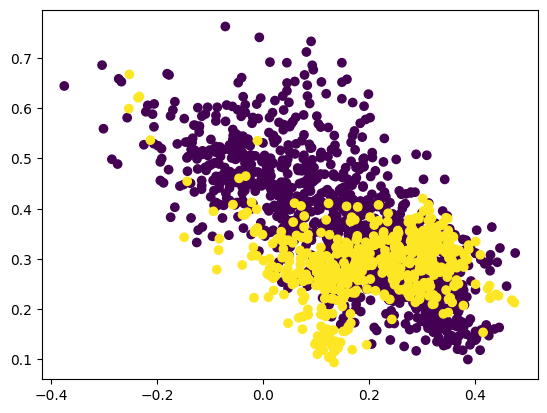

In [35]:
_X = temp[user_id][2][:, 30:32]
plt.scatter(_X[:, 0], _X[:, 1], c=temp[user_id][3])

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

In [45]:
param_grid = [
  {'n_estimators': [500], 
    'min_samples_split': [2],
    'min_samples_leaf': [8],
    'max_depth': [8],
    'bootstrap': [True, False],
    'oob_score': [True, False],
  },
]

clf = ExtraTreesClassifier(
                n_estimators = 250,
                random_state = random_state, 
                n_jobs = -1, 
                max_features = 'sqrt', 
                max_depth = 8, 
                min_samples_split = 2, 
                min_samples_leaf = 4,
                oob_score = True, 
                bootstrap = True, 
                # class_weight = 'balanced'
            )

In [46]:
g = GridSearchCV(clf, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=3)
g.fit(temp[user_id][0], temp[user_id][1])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END bootstrap=False, max_depth=8, min_samples_leaf=8, min_samples_split=2, n_estimators=500, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=8, min_samples_leaf=8, min_samples_split=2, n_estimators=500, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=8, min_samples_leaf=8, min_samples_split=2, n_estimators=500, oob_score=True;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=8, min_samples_leaf=8, min_samples_split=2, n_estimators=500, oob_score=True;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=8, min_samples_leaf=8, min_samples_split=2, n_estimators=500, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=8, min_samples_leaf=8, min_samples_split=2, n_estimators=500, oob_score=False;, score=1.000 total time=   3.5s
[CV 4/5] END bootstrap=True, max_depth=8, min_sam

/home/nmduy/anaconda3/envs/stress/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nmduy/anaconda3/envs/stress/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nmduy/anaconda3/envs/stress/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 437, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings

GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(bootstrap=True,
                                            class_weight='balanced',
                                            max_depth=8, min_samples_leaf=4,
                                            n_estimators=250, n_jobs=-1,
                                            oob_score=True, random_state=0),
             n_jobs=-1,
             param_grid=[{'bootstrap': [True, False], 'max_depth': [8],
                          'min_samples_leaf': [8], 'min_samples_split': [2],
                          'n_estimators': [500], 'oob_score': [True, False]}],
             scoring='balanced_accuracy', verbose=3)

In [47]:
g.best_estimator_
# g.best_score_

ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_depth=8,
                     min_samples_leaf=8, n_estimators=500, n_jobs=-1,
                     oob_score=True, random_state=0)

In [23]:
clf = ExtraTreesClassifier(
                n_estimators = 500,
                random_state = random_state, 
                n_jobs = -1, 
                max_features = 'sqrt', 
                max_depth = 8, 
                min_samples_split = 8, 
                min_samples_leaf = 8,
                # oob_score = True, 
                # bootstrap = True, 
                # class_weight = 'balanced'
            )

clf.fit(temp[user_id][0], temp[user_id][1])
y_pred = clf.predict(temp[user_id][2])

In [24]:
from sklearn.metrics import balanced_accuracy_score

score = balanced_accuracy_score(temp[user_id][3], y_pred)
print(score)

0.40479985737806345
